**Hiện thực lại 4.1 với dataset khác đã được trích xuất thuộc tính ở 4.2**

# **Nạp dữ liệu**

Dữ liệu đã được trích xuất thuộc tính có tên được lưu trong file phishing.csv

In [1]:
data_dir = "Dataset-Lab 4/"

In [2]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the data
data0 = pd.read_csv(data_dir + 'preprocessed_data.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0


# **Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [4]:
#Check shape
data0.shape

(20000, 18)

In [5]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         20000 non-null  object
 1   Have_IP        20000 non-null  int64 
 2   Have_At        20000 non-null  int64 
 3   URL_Length     20000 non-null  int64 
 4   URL_Depth      20000 non-null  int64 
 5   Redirection    20000 non-null  int64 
 6   https_Domain   20000 non-null  int64 
 7   TinyURL        20000 non-null  int64 
 8   Prefix/Suffix  20000 non-null  int64 
 9   DNS_Record     20000 non-null  int64 
 10  Web_Traffic    20000 non-null  int64 
 11  Domain_Age     20000 non-null  int64 
 12  Domain_End     20000 non-null  int64 
 13  iFrame         20000 non-null  int64 
 14  Mouse_Over     20000 non-null  int64 
 15  Right_Click    20000 non-null  int64 
 16  Web_Forwards   20000 non-null  int64 
 17  Label          20000 non-null  int64 
dtypes: int64(17), object(1)
me

# **Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng.

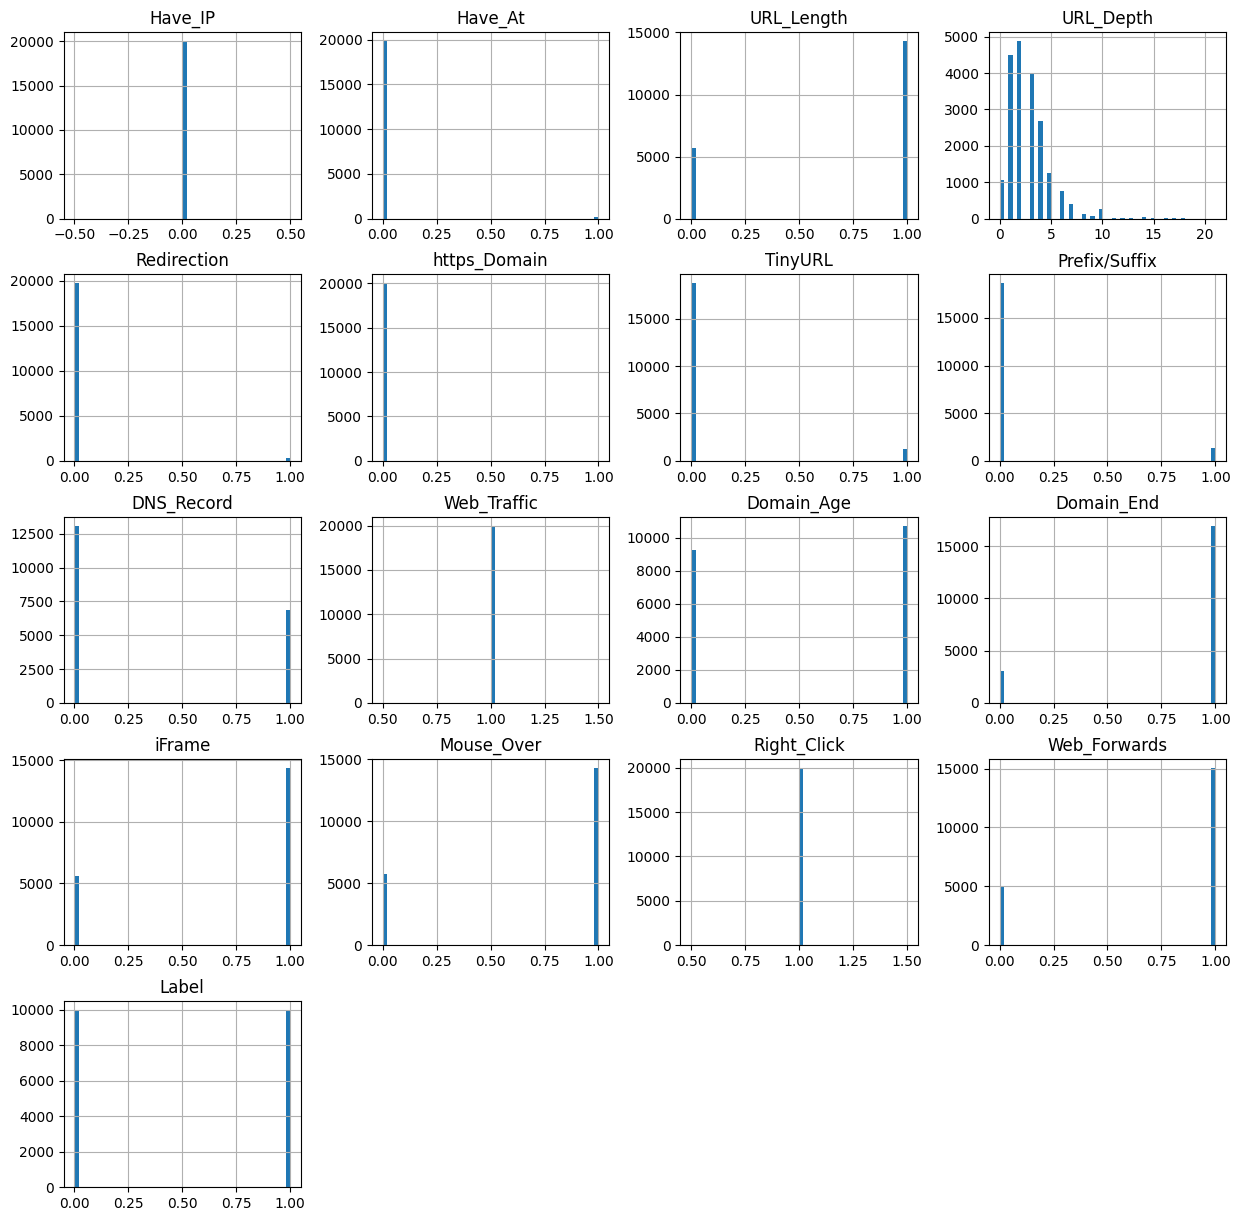

In [7]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

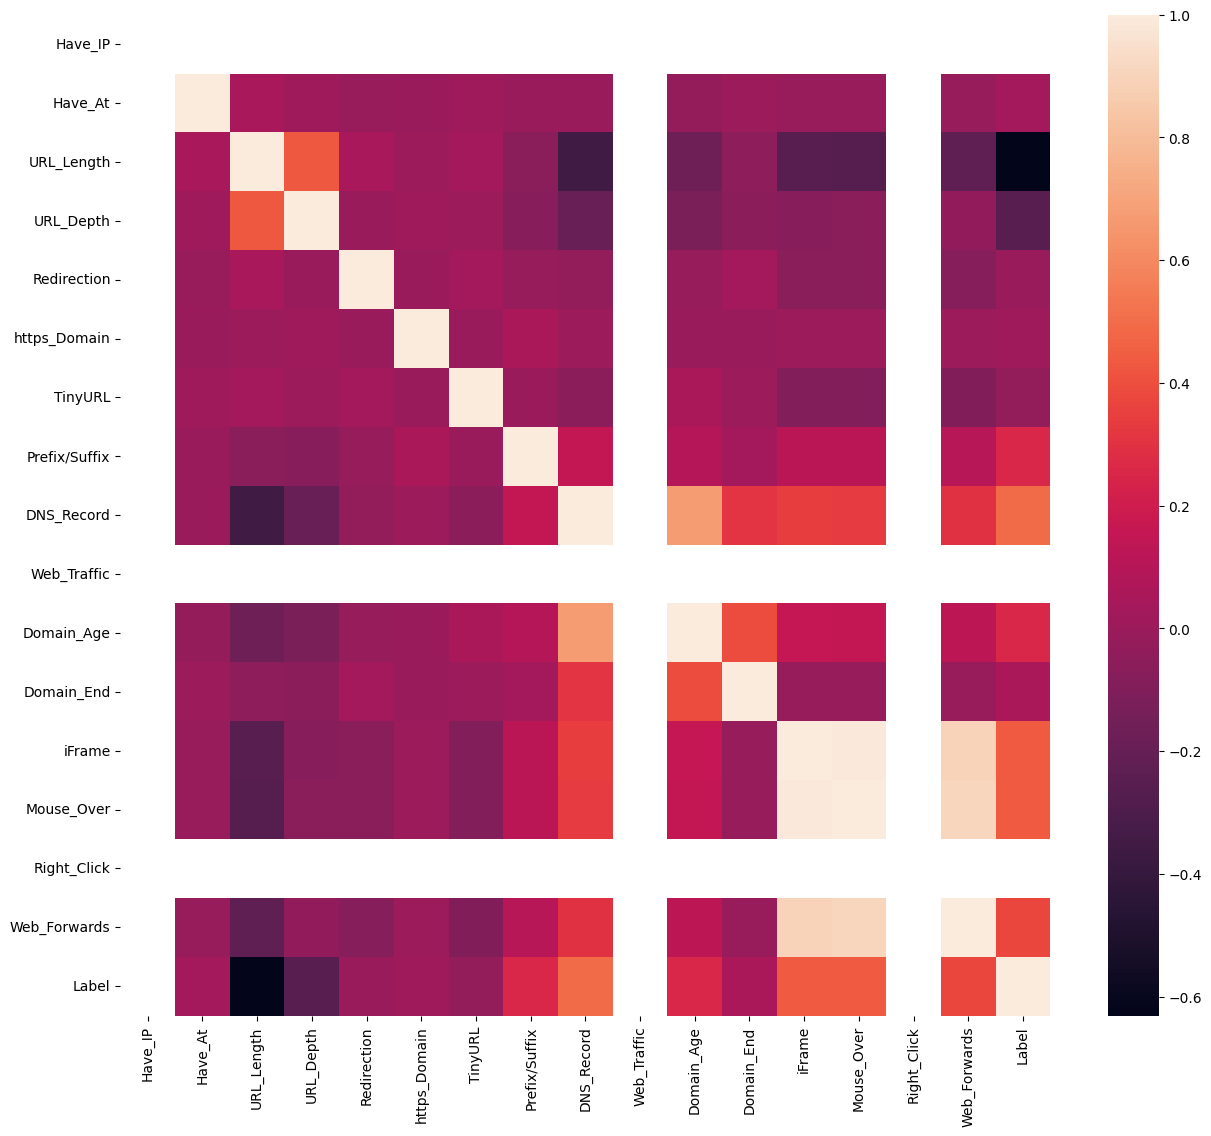

In [8]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.drop('Domain', axis=1).corr())
plt.show()

# **Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [9]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,0.0,0.008550,0.715100,2.780850,0.013950,0.000200,0.062300,0.068550,0.344050,1.0,0.536950,0.848450,0.719700,0.715050,1.0,0.753800,0.500000
std,0.0,0.092072,0.451378,1.999656,0.117286,0.014141,0.241706,0.252694,0.475069,0.0,0.498645,0.358593,0.449157,0.451402,0.0,0.430807,0.500013
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,0.0,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột  'Domain' & 'URL_Depth'. Cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó. Ngoài ra, có các cột chỉ có một giá trị duy nhất, vì vậy chúng cũng không có ý nghĩa gì trong việc đào tạo mô hình. Chúng ta sẽ loại bỏ các cột này và chỉ giữ lại các cột có nhiều hơn 1 giá trị duy nhất. Cuối cùng, chúng ta sẽ chuyển đổi các cột còn lại thành các biến nhị phân (0 và 1) để sử dụng trong mô hình.

In [10]:
#Drop Domain column
data = data0.drop(['Domain', 'Have_IP', 'Have_At', 'Redirection', 'https_Domain', 'Web_Traffic',
                   'Right_Click']
                  , axis = 1).copy()

Ta còn lại 10 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [11]:
#check data null
data.isnull().sum()

URL_Length       0
URL_Depth        0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Web_Forwards     0
Label            0
dtype: int64

In [12]:
# Min-Max Normalization
data['URL_Depth'] = (data['URL_Depth'] - data['URL_Depth'].min()) / (data['URL_Depth'].max() - data['URL_Depth'].min())

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [13]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,URL_Length,URL_Depth,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Web_Forwards,Label
0,1,0.095238,0,0,0,0,0,1,1,1,0
1,1,0.047619,0,0,0,0,1,0,0,0,0
2,1,0.190476,0,0,0,0,0,1,1,1,0
3,0,0.190476,0,0,1,1,1,1,1,1,1
4,1,0.047619,0,0,0,0,1,0,0,0,0


# **Chia dữ liệu**

In [14]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((20000, 10), (20000,))

In [15]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16000, 10), (4000, 10))

# **Đào tạo mô hình học máy/học sâu**
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Long Short-Term Memory (LSTM) network
* Support Vector Machines

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# Creating model results
Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **Decision Tree Classifier**

In [18]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [19]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [20]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.882
Decision Tree: Accuracy on test Data: 0.876


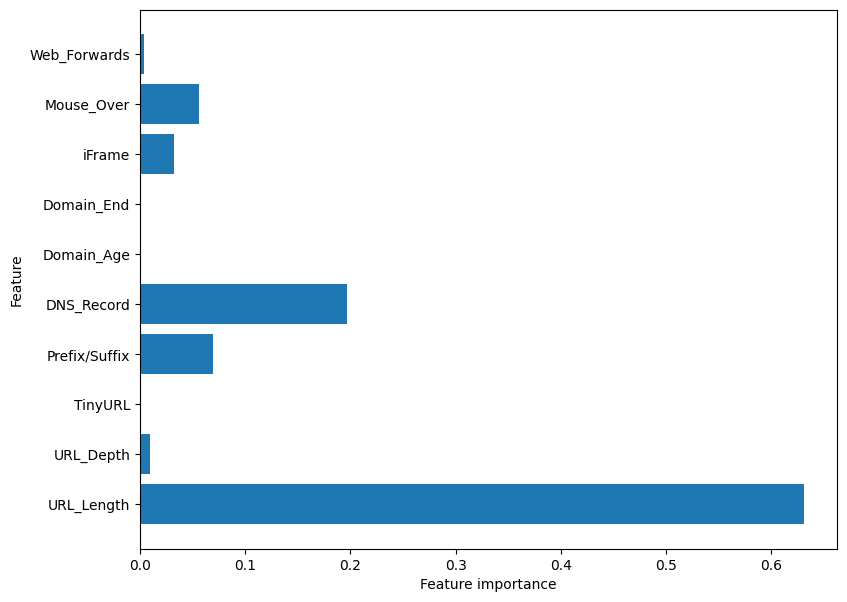

In [21]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [22]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **Random Forest Classifier**

In [23]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [24]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [25]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.881
Random forest: Accuracy on test Data: 0.875


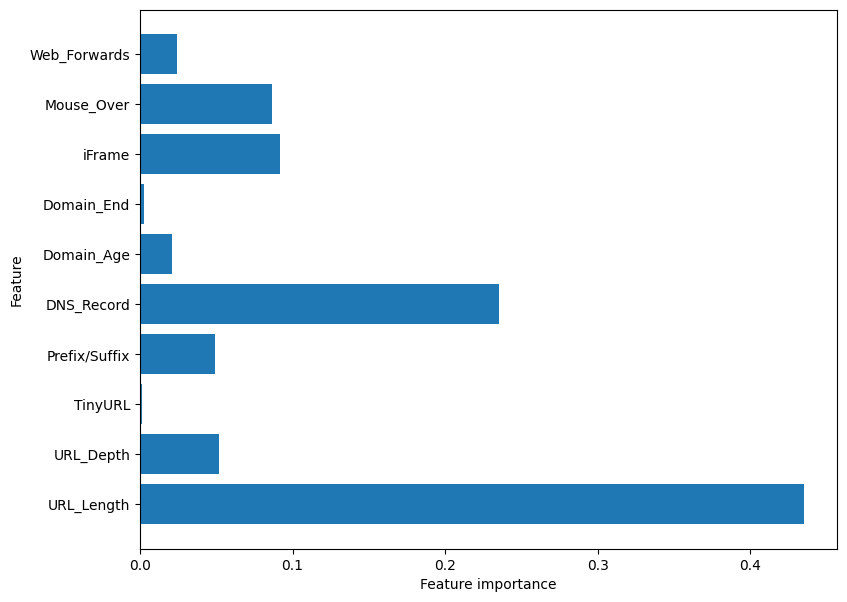

In [26]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [27]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## **Multilayer Perceptrons (MLPs) - Học sâu**

In [28]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [29]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [30]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.894
Multilayer Perceptrons: Accuracy on test Data: 0.888


**Lưu trữ kết quả**

In [31]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **XGBoost Classifier**

In [32]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [34]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.895
XGBoost : Accuracy on test Data: 0.888


**Lưu trữ kết quả**

In [35]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **Long Short-Term Memory (LSTM) network**
***Bài tập số 1: Hoàn thành huấn luyện mô hình LSTM.***

In [36]:
# Import necessary libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

2025-04-22 15:47:04.306655: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 15:47:04.310790: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 15:47:04.323484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745336824.341334   34166 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745336824.347576   34166 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745336824.366627   34166 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [37]:
# Reshape data for LSTM [samples, time steps, features]
# We treat each sample as one time step with n_features
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

print(X_train_lstm.shape)
print(X_test_lstm.shape)

(16000, 1, 10)
(4000, 1, 10)


In [38]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(1, X_train.shape[1]), activation='relu'))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.summary()

2025-04-22 15:47:06.071038: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/workspaces/ML-lab/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Train the model
# Using a small number of epochs for demonstration
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6981 - loss: 0.6204 - val_accuracy: 0.8559 - val_loss: 0.3564
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3412 - val_accuracy: 0.8759 - val_loss: 0.3118
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.3094 - val_accuracy: 0.8766 - val_loss: 0.3028
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.2970 - val_accuracy: 0.8766 - val_loss: 0.2998
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.2994 - val_accuracy: 0.8766 - val_loss: 0.2966
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8765 - loss: 0.3008 - val_accuracy: 0.8766 - val_loss: 0.2955
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.2956 - val_accuracy: 0.8769 - val_loss: 0.2943
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8855 - loss: 0.2839 - val_accuracy: 0.

In [40]:
# Predicting
# Predict probabilities
y_train_prob_lstm = lstm_model.predict(X_train_lstm)
y_test_prob_lstm = lstm_model.predict(X_test_lstm)

# Convert probabilities to binary predictions (0 or 1)
y_train_lstm = (y_train_prob_lstm > 0.5).astype(int)
y_test_lstm = (y_test_prob_lstm > 0.5).astype(int)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


**Đánh giá hiệu suất**

In [41]:
# Computing the accuracy
acc_train_lstm = accuracy_score(y_train, y_train_lstm)
acc_test_lstm = accuracy_score(y_test, y_test_lstm)

print("LSTM: Accuracy on training Data: {:.3f}".format(acc_train_lstm))
print("LSTM: Accuracy on test Data: {:.3f}".format(acc_test_lstm))

LSTM: Accuracy on training Data: 0.881
LSTM: Accuracy on test Data: 0.875


**Lưu trữ kết quả**

In [42]:
storeResults('LSTM', acc_train_lstm, acc_test_lstm)

## **Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyện mô hình SVM.***

In [43]:
from sklearn.svm import SVC

# Support Vector Machines model

# instantiate
svm = SVC(kernel='linear', C=1)

# fit
svm.fit(X_train, y_train)

# predicting
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

# computing the accuracy
acc_train_svm = accuracy_score(y_train, y_train_svm)
acc_test_svm = accuracy_score(y_test, y_test_svm)

print("Support Vector Machines: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("Support Vector Machines: Accuracy on test Data: {:.3f}".format(acc_test_svm))

# store results
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

Support Vector Machines: Accuracy on training Data: 0.879
Support Vector Machines: Accuracy on test Data: 0.874


# **So sánh các mô hình**

In [44]:
results = pd.DataFrame({ 'Model': Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.882,0.876
1,Random Forest,0.881,0.875
2,Multilayer Perceptrons,0.894,0.888
3,XGBoost,0.895,0.888
4,LSTM,0.881,0.875
5,Support Vector Machines,0.879,0.874


In [45]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,Model,Train Accuracy,Test Accuracy
3,XGBoost,0.895,0.888
2,Multilayer Perceptrons,0.894,0.888
0,Decision Tree,0.882,0.876
1,Random Forest,0.881,0.875
4,LSTM,0.881,0.875
5,Support Vector Machines,0.879,0.874


***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

In [46]:
results = pd.DataFrame({ 'Model': Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.882,0.876
1,Random Forest,0.881,0.875
2,Multilayer Perceptrons,0.894,0.888
3,XGBoost,0.895,0.888
4,LSTM,0.881,0.875
5,Support Vector Machines,0.879,0.874


In [47]:
import joblib

# Tạo từ điển ánh xạ tên mô hình với đối tượng mô hình
model_mapping = {
    'Decision Tree': tree,
    'Random Forest': forest,
    'Multilayer Perceptrons': mlp,
    'XGBoost': xgb,
    'Support Vector Machines': svm
}

# Sắp xếp kết quả theo độ chính xác
sorted_results = results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)
print("Kết quả so sánh các mô hình:")
print(sorted_results)

# Lấy tên mô hình có độ chính xác cao nhất
best_model_name = sorted_results.iloc[0]['Model']
print(f"\nMô hình có độ chính xác cao nhất: {best_model_name}")

# Lưu trữ mô hình tốt nhất
for model_name, model_object in model_mapping.items():
    if model_name == best_model_name:
        joblib.dump(model_object, f'best_model_{model_name.lower().replace(" ", "_")}.pkl')
        print(f"Mô hình {model_name} đã được lưu trữ thành công.")
        break

Kết quả so sánh các mô hình:
                     Model  Train Accuracy  Test Accuracy
3                  XGBoost           0.895          0.888
2   Multilayer Perceptrons           0.894          0.888
0            Decision Tree           0.882          0.876
1            Random Forest           0.881          0.875
4                     LSTM           0.881          0.875
5  Support Vector Machines           0.879          0.874

Mô hình có độ chính xác cao nhất: XGBoost
Mô hình XGBoost đã được lưu trữ thành công.
